In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

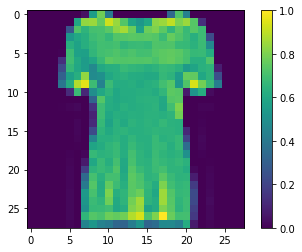

In [5]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

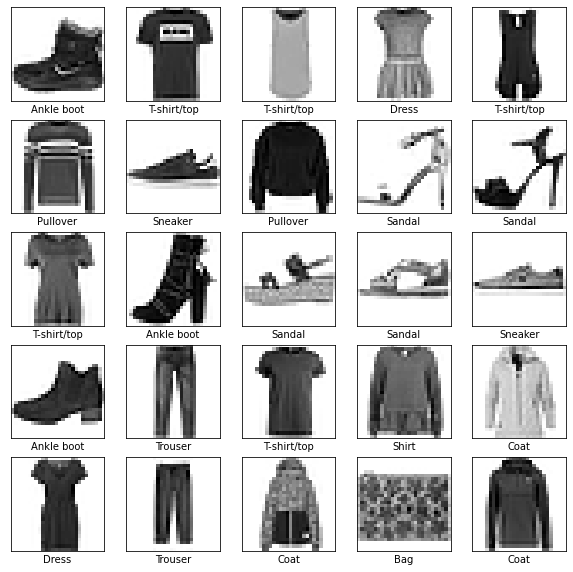

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
   tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
   tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 4s 5ms/step - loss: 1.7465 - accuracy: 0.3618 - val_loss: 0.6874 - val_accuracy: 0.7743
Epoch 2/10
112/112 [==============================] - 0s 4ms/step - loss: 0.8620 - accuracy: 0.6984 - val_loss: 0.5138 - val_accuracy: 0.8290
Epoch 3/10
112/112 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.7602 - val_loss: 0.4572 - val_accuracy: 0.8443
Epoch 4/10
112/112 [==============================] - 0s 4ms/step - loss: 0.5967 - accuracy: 0.7962 - val_loss: 0.4273 - val_accuracy: 0.8537
Epoch 5/10
112/112 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.8137 - val_loss: 0.4258 - val_accuracy: 0.8540
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.5120 - accuracy: 0.8270 - val_loss: 0.3924 - val_accuracy: 0.8670
Epoch 7/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4928 - accuracy: 0.8332 - val_loss: 0.3903 - val_accuracy: 0.8660
Epoch 

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3826 - accuracy: 0.8689

Test accuracy: 0.8689000010490417


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [14]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

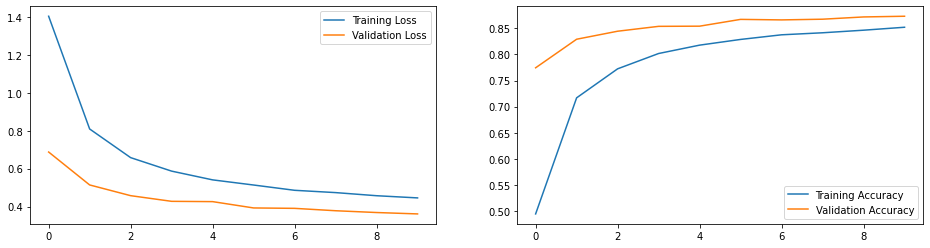

In [15]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [16]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3826 - accuracy: 0.8689
0.3825528919696808
0.8689000010490417


In [17]:
predictions = model.predict(test_images)

In [18]:
print(predictions)

[[ -5.6699266   -4.45766     -5.6179724  ...   1.4885181   -3.5230355
    5.107179  ]
 [  4.7162905   -7.2293506   13.927636   ... -22.53963     -1.9330938
  -12.461288  ]
 [ 14.976328    35.153214     2.8076568  ... -19.994577   -22.986967
    6.656452  ]
 ...
 [ -1.0652386  -18.67021     -2.2792337  ...  -2.3242037   11.234213
   -6.018472  ]
 [ 10.461611    23.99641      2.1732724  ... -13.259711   -15.586209
    4.2052712 ]
 [ -3.0196123   -8.40321     -9.843632   ...   1.8628093   -0.7264507
    0.21803716]]


In [19]:
import numpy as np

print(np.argmax(predictions[0]))

9


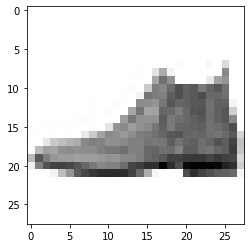

In [20]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [21]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [22]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4949,    5,   45,  140,   17,    3,  532,    0,   27,    0],
       [   2, 5545,    2,  106,    8,    0,   16,    0,    0,    0],
       [  28,    0, 4319,   34,  862,    0,  460,    0,    7,    0],
       [ 174,   22,   27, 5148,  206,    1,  107,    0,    2,    1],
       [   4,    2,  303,  166, 4857,    1,  351,    0,   13,    0],
       [   0,    0,    0,    0,    0, 5567,    0,   69,    7,   57],
       [ 867,    6,  418,  110,  512,    0, 3748,    1,   39,    1],
       [   0,    0,    0,    0,    0,  226,    1, 5276,    7,  178],
       [   8,    0,   13,   11,   27,   22,   75,   11, 5544,    2],
       [   0,    0,    0,    0,    0,   51,    0,  155,    0, 5499]],
      dtype=int32)>

In [23]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

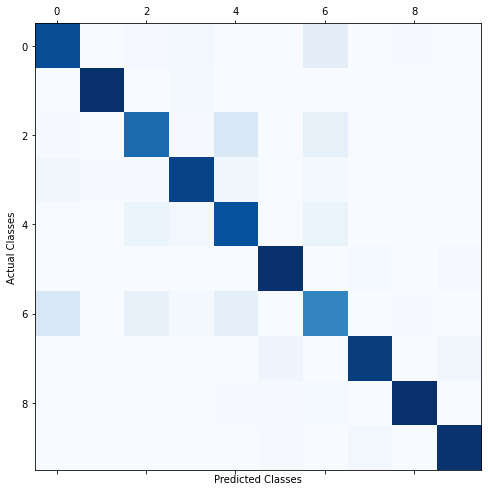

In [24]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()